In [60]:
import pandas as pd
import numpy as np

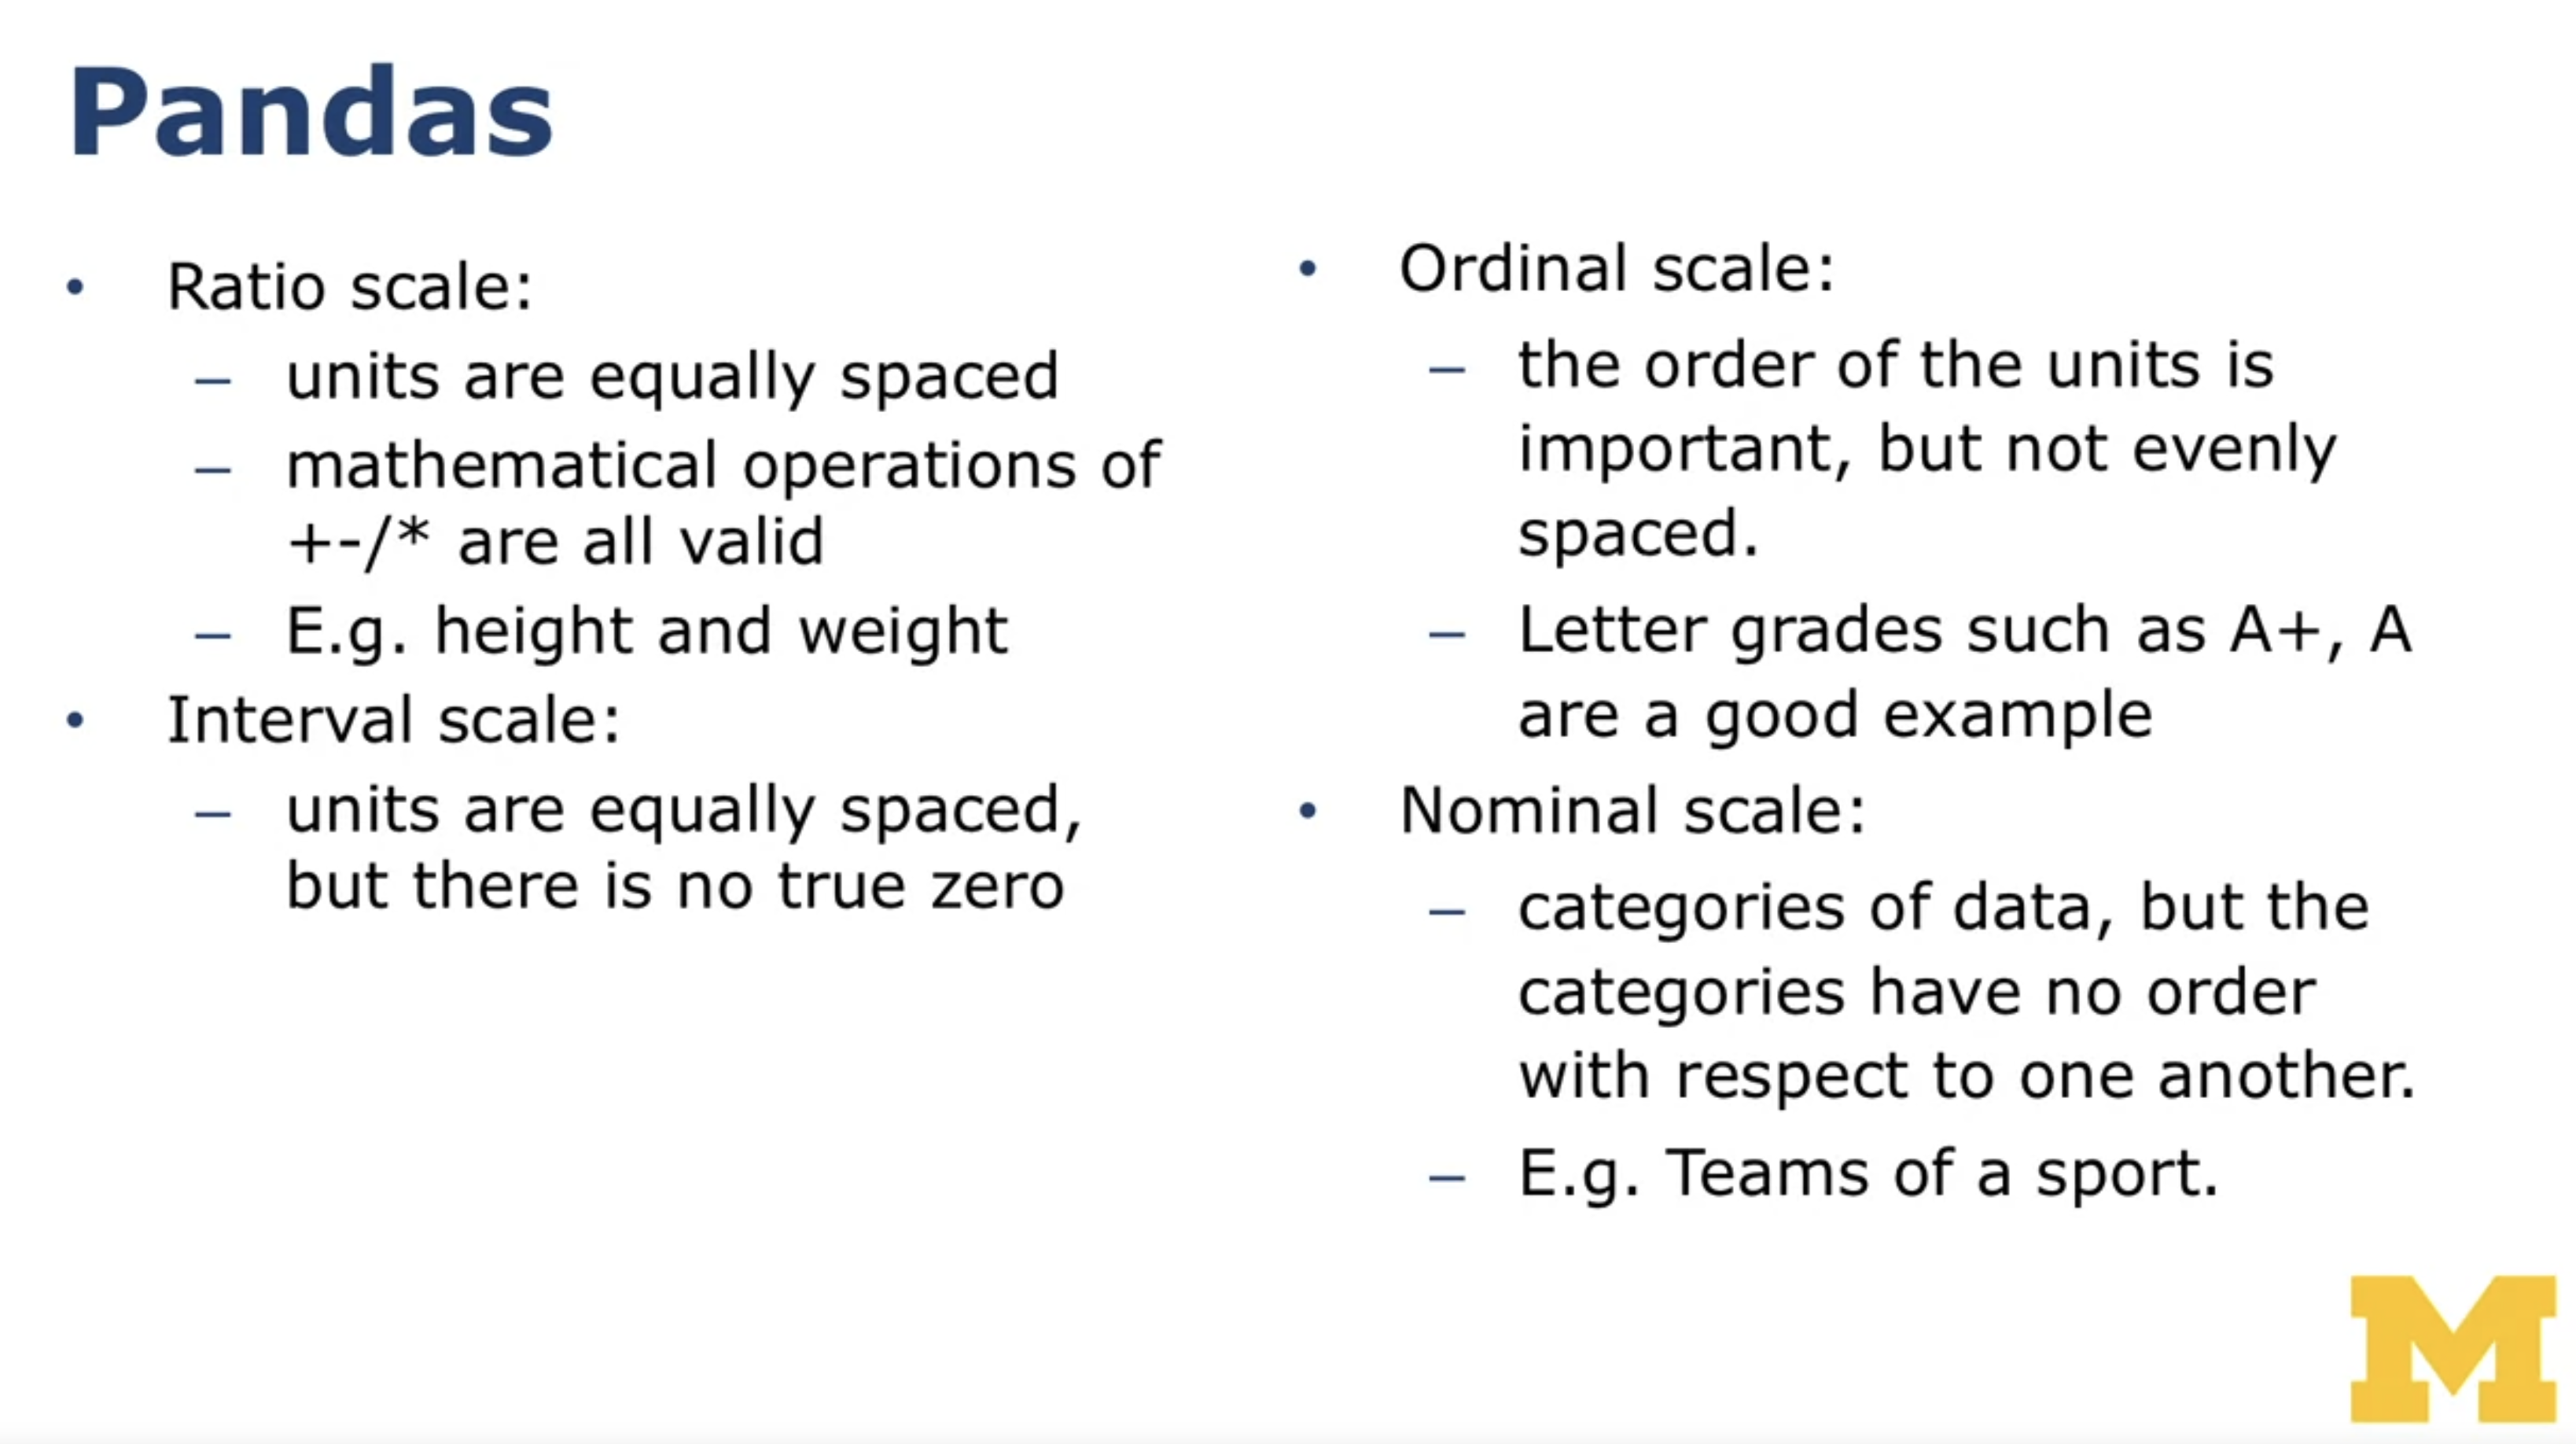

In [61]:
from PIL import Image
from IPython.display import display

im = Image.open('scales.png')
display(im)

## Categorical/Nominal Data Type Scale

In [62]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index = ['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'],
                  columns = ['grades'])
df
# by default, the data type of this will be object

,grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [63]:
# now, we want to change the data type to category - using the astype() function
df.astype('category')

,grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


## Ordered Data Type

In [64]:
# we can specify the order of the categories by settind the order = True
categories = pd.CategoricalDtype(['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered = True)
grades = df.astype(categories)
grades

,grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [65]:
# the order of the categories helps with comparisons and boolean masks. example
df[df['grades'] > 'C']
# this workd on lexographical comparisons, so does not provide us with intended results

,grades
ok,C+
ok,C-
poor,D+
poor,D


In [66]:
grades[grades['grades'] > 'C']
# here we get the intended result because of the order we provided

,grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+


## cut() function

In [67]:
# lets take a look at census data again
df = pd.read_csv('datasets/census.csv')
df = df[df['SUMLEV'] == 50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.mean)
df.head()

/var/folders/2b/z0sb3jmj0_74xyl8zt7pnv4h0000gn/T/ipykernel_83636/2969618592.py:4: FutureWarning: The provided callable <function mean at 0x109f29b20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.mean)


STNAME
Alabama        71339.343284
Alaska         24490.724138
Arizona       426134.466667
Arkansas       38878.906667
California    642309.586207
Name: CENSUS2010POP, dtype: float64

In [68]:
# now, we will create 10 'bins' from this, each representing a category
pd.cut(df, 10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     